In [1]:
import math
import numpy as np
import trace_graph
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.00001
slope = (f(xs+h) - f(xs))/h
print(np.vstack((xs, slope)).T)

In [ ]:
h = 0.0001

def simple_func(a,b,c):
    return a*b + c

# inputs
a = 2.0
b = -3.0
c = 10.0

# slope wrt a
d1 = simple_func(a,b,c)
d2 = simple_func(a+h,b,c)
print('slope wrt a: ', d1, d2, (d2-d1)/h)

# slope wrt b
d1 = simple_func(a,b,c)
d2 = simple_func(a,b+h,c)
print('slope wrt b: ', d1, d2, (d2-d1)/h)

# slope wrt c
d1 = simple_func(a,b,c)
d2 = simple_func(a,b,c+h)
print('slope wrt c: ', d1, d2, (d2-d1)/h)

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float) -> None:
        self.data = data
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other: Self) -> Self:
        return Value(self.data + other.data)
    
    def __mul__(self, other: Self) -> Self:
        return Value(self.data * other.data)

a = Value(2.0)    
b = Value(-3.0)
c = Value(10.0)
print(a+b)
print(a*b+c)

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=()) -> None:
        self.data = data
        self._prev = set(_children)
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev})"
    
    def __add__(self, other: Self) -> Self:
        return Value(self.data + other.data, (self, other))
    
    def __mul__(self, other: Self) -> Self:
        return Value(self.data * other.data, (self, other))

a = Value(2.0)    
b = Value(-3.0)
c = Value(10.0)
print(a+b)
print(a*b+c)

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='') -> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self:
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other: Self) -> Self:
        return Value(self.data * other.data, (self, other), '*')

a = Value(2.0)    
b = Value(-3.0)
c = Value(10.0)
print(a+b)
print(a*b+c)

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='', label='') -> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self:
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other: Self) -> Self:
        return Value(self.data * other.data, (self, other), '*')

a = Value(2.0, label='a')    
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd'
e = d+c; e.label = 'e'
f = Value(-2.0, label='f')
L = e*f; L.label = 'L'

In [ ]:
from importlib import reload
reload(trace_graph)
trace_graph.draw_dot(L)

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self:
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other: Self) -> Self:
        return Value(self.data * other.data, (self, other), '*')

a = Value(2.0, label='a')    
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd'
e = d+c; e.label = 'e'
f = Value(-2.0, label='f')
L = e*f; L.label = 'L'

In [ ]:
from importlib import reload
reload(trace_graph)
trace_graph.draw_dot(L)

### computing the gradient manually

In [ ]:
L.grad = 1.0
e.grad = L.grad * f.data
f.grad = L.grad * e.data
d.grad = e.grad * 1.0
c.grad = e.grad * 1.0
b.grad = d.grad * a.data
a.grad = d.grad * b.data

In [ ]:
from importlib import reload
reload(trace_graph)
trace_graph.draw_dot(L)

### moving in the direction of the gradient will increase the function value

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
d = a*b
e = d+c
L = e*f
print(L.data)

### small MLP

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self:
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other: Self) -> Self:
        return Value(self.data * other.data, (self, other), '*')
    
    def tanh(self) -> Self:
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        return Value(t, (self,), 'tanh')

In [ ]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373587, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
print(o)

In [ ]:
trace_graph.draw_dot(o)

In [ ]:
o.grad = 1.0
n.grad = 1 - o.data**2
b.grad = n.grad
x1w1x2w2.grad = n.grad
x2w2.grad = x1w1x2w2.grad
x1w1.grad = x1w1x2w2.grad
w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad

In [ ]:
trace_graph.draw_dot(o)

### backward implementation

In [ ]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self:
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other: Self) -> Self:
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self) -> Self:
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad            
        out._backward = _backward
        return out

In [ ]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373587, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
o.grad = 1.0

In [ ]:
o._backward()
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

In [ ]:
trace_graph.draw_dot(o)

### implementing backward inside the Value class

In [7]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self:
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other: Self) -> Self:
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self) -> Self:
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad            
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v in visited: return
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [8]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373587, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [9]:
o.backward()

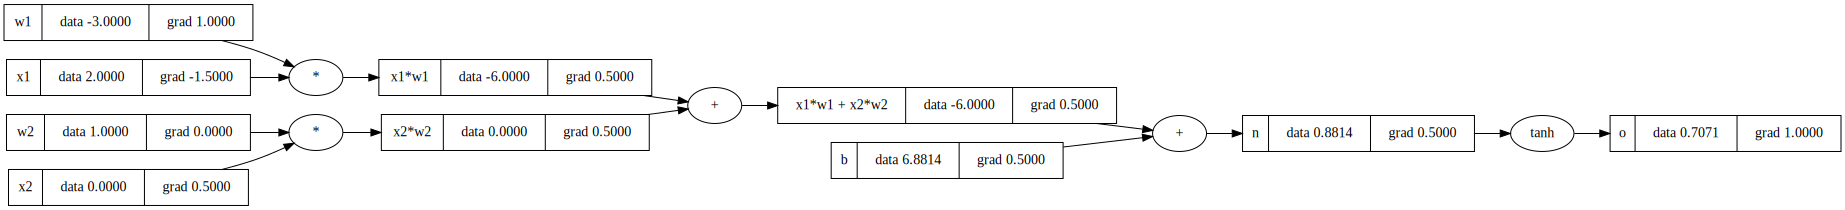

In [10]:
trace_graph.draw_dot(o)

### generalizing the Value class to include exponentiation and division functions

In [11]:
from typing import Self

class Value:

    def __init__(self, data: float, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data}, prev={self._prev}, op={self._op})"
    
    def __add__(self, other: Self) -> Self: # self + other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __neg__(self) -> Self: # -self
        return self * -1
    
    def __sub__(self, other) -> Self: # self - other
        return self + (-other)
    
    def __mul__(self, other: Self) -> Self: # self * other
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other) -> Self: # self ^ other
        assert isinstance(other, (int, float)), "only supports int or float powers"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad = (other * (self.data ** (other-1))) * out.grad
        out._backward = _backward

        return out    

    def __rmul__(self, other: Self) -> Self: # other * self
        return self * other
    
    def __truediv__(self, other) -> Self: # self / other
        return self * (other ** -1)
    
    def tanh(self) -> Self:
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad            
        out._backward = _backward
        
        return out
    
    def exp(self) -> Self:
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad = out.data * out.grad
        out._backward = _backward
        
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v in visited: return
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

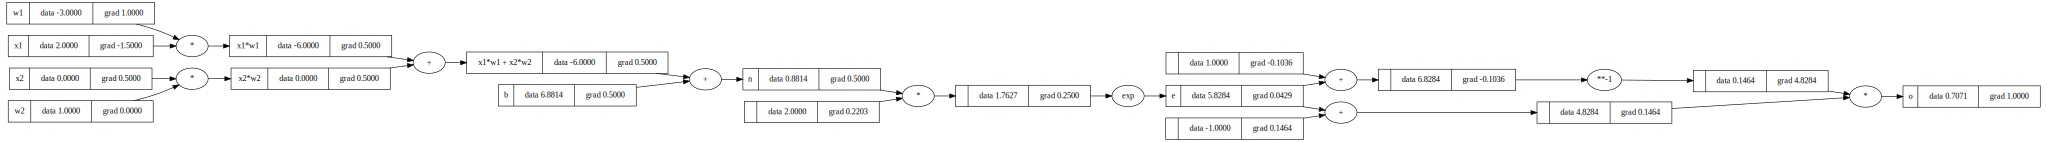

In [12]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.881373587, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#----
#o = n.tanh(); o.label = 'o'
e = (2*n).exp(); e.label = 'e'
o = (e-1) / (e+1)
#----
o.label = 'o'
o.backward()
trace_graph.draw_dot(o)

### implementing the function using PyTorch

In [15]:
import torch

x1 = torch.Tensor([2.]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b; n.retain_grad()
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('x1', x1.grad.item())
print('x2', x2.grad.item())
print('w1', w1.grad.item())
print('w2', w2.grad.item())
print('n', n.grad.item())

0.7071066904050358
x1 -1.5000003851533106
x2 0.5000001283844369
w1 1.0000002567688737
w2 0.0
n 0.5000001283844369


### Higher level functions using the Value class
### Neuron

In [16]:
from typing import Self
import random

class Neuron:
    def __init__(self, n: int) -> None:
        self.w = [Value(random.uniform(-1,1)) for _ in range(n)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x) -> Value:
        # w*x + b
        assert len(x) == len(self.w)
        act = sum((xi*wi for xi, wi in zip(x, self.w)), self.b)
        out = act.tanh()
        return out
    
class Layer:
    def __init__(self, nin: int, nout: int) -> None:
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        out = [neuron(x) for neuron in self.neurons]
        return out[0] if len(out) == 1 else out

class MLP:
    def __init__(self, nin, nouts) -> None:
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [17]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9478926935970284, prev={Value(data=1.8105991101374976, prev={Value(data=0.04251035930124065, prev={Value(data=-0.986536958608329, prev={Value(data=-2.497099961750159, prev={Value(data=-2.258796294454139, prev={Value(data=-1.7282038067183272, prev={Value(data=-1.3348514365356543, prev={Value(data=-0.8295571114016296, prev=set(), op=), Value(data=-0.5052943251340248, prev={Value(data=-0.6640127980541204, prev=set(), op=), Value(data=0.7609707623328682, prev={Value(data=0.9985173138481409, prev={Value(data=0.5563749199498957, prev={Value(data=-1.0, prev=set(), op=), Value(data=-0.5563749199498957, prev=set(), op=)}, op=*), Value(data=0.44214239389824517, prev={Value(data=-2.268489791833974, prev={Value(data=-1.5267609477169204, prev={Value(data=-0.7633804738584602, prev=set(), op=), Value(data=2.0, prev=set(), op=)}, op=*), Value(data=-0.741728844117054, prev=set(), op=)}, op=+), Value(data=2.7106321857322193, prev={Value(data=3.0, prev=set(), op=), Value(data=0.9035440619107